In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image
image = mpimg.imread('./calibration_wide/signs_vehicles_xygrad.jpg')


In [6]:

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    mag = np.sqrt(sobelx**2+sobely**2)
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    #scalemag = np.uint8(255*mag/np.max(mag))
    scale_factor = np.max(mag)/255 
    scalemag = (mag/scale_factor).astype(np.uint8) 
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scalemag)
    binary_output[(scalemag>=mag_thresh[0]) & (scalemag<=mag_thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    
    return binary_output
    


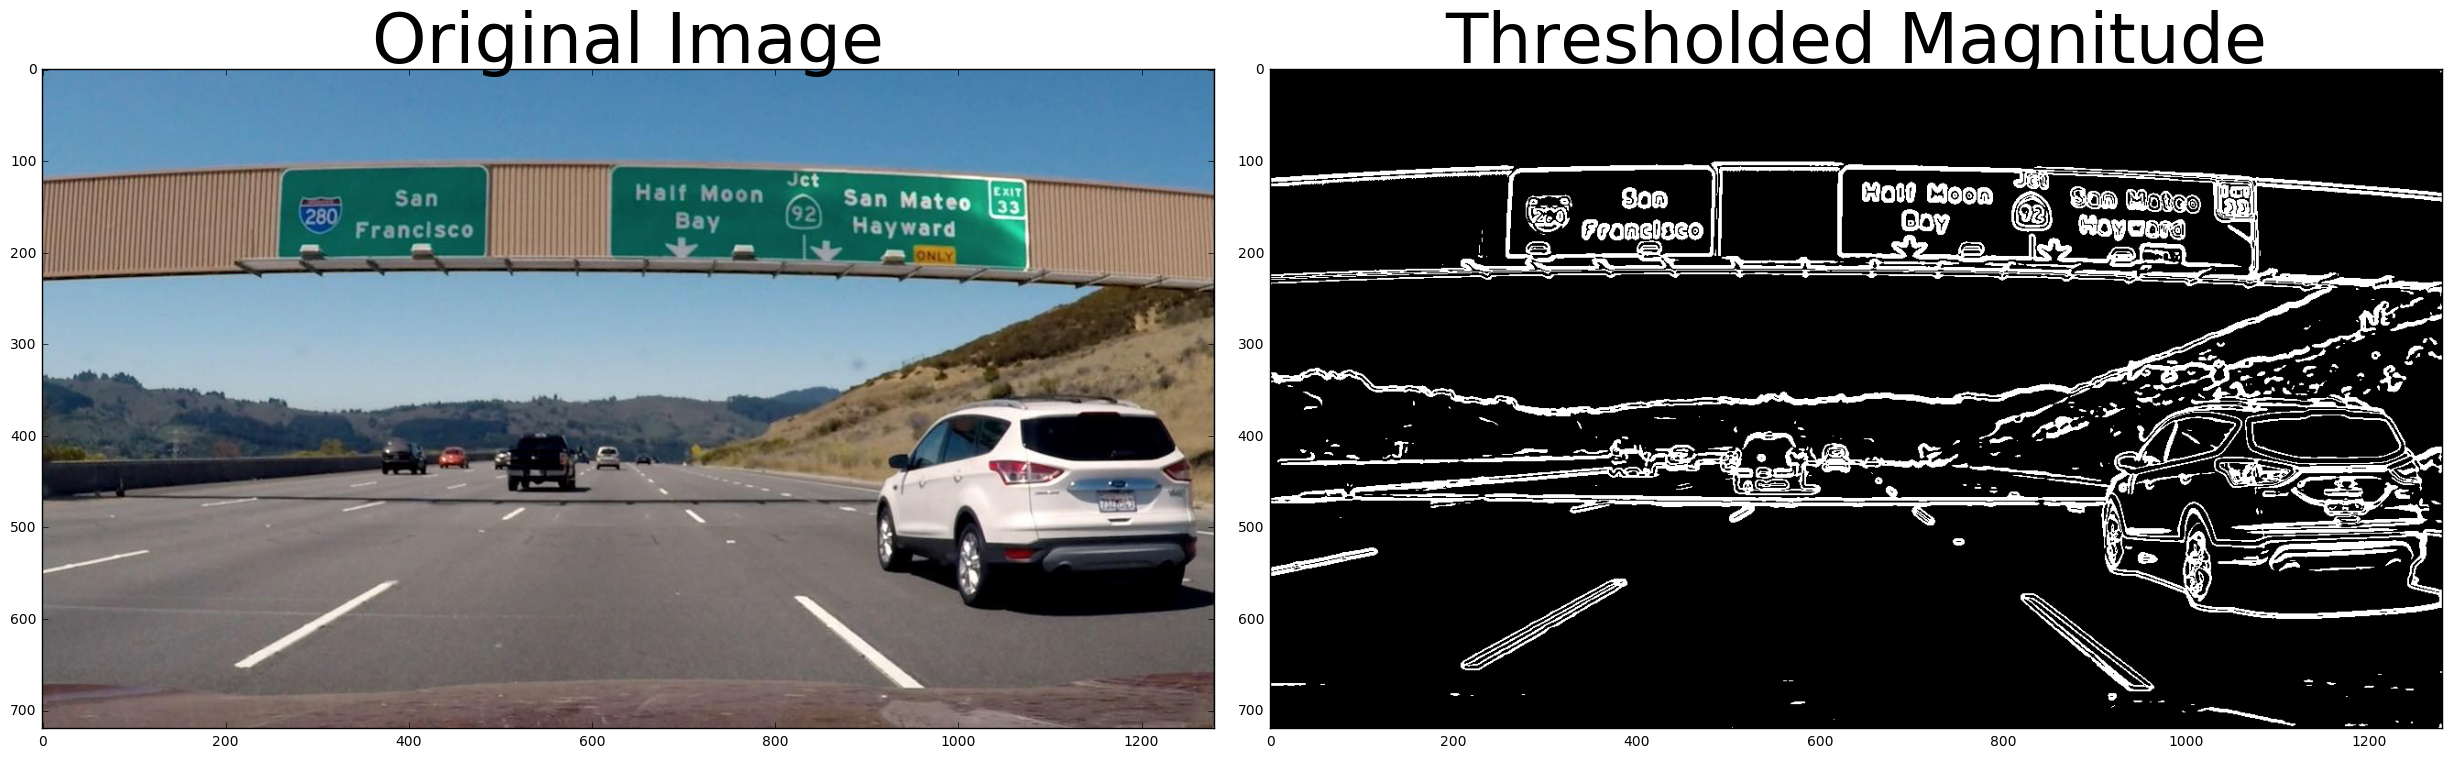

In [7]:
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=15, mag_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)